## Task 01- Prediction using supervised learning 

Prediction of percentage of marks of a student based on the number of hours he/she studies 

The first step is to import the libraries that are required for the implementation of the code operation.  Here we import the Pandas to import and analyze data, NumPy to perform the multi-dimensional operation, and matplotlib to perform graphical plot into the context.

In [ ]:
# Importing all libraries required in this notebook
import pandas as pd  
import numpy as np    
import matplotlib.pyplot as plt  
%matplotlib inline 

The next phase is to load the data into the program to perform the desired operation. Here we use the pandas to load the excel data and when data is successfully loaded we print a statement  to get confirmation.

In [ ]:
# Reading data from remote link
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")


Data imported successfully


In [ ]:
# Reading data from the google colab cloud
data_load = pd.read_csv("SLR.csv")  
print("Successfully imported data into console" ) 

Successfully imported data into console


Next is to view the data and so we are using the head() function. The head function default view is the top five, but again whatever you want to be in the number of views you can do it as entered, in this case, I have entered six views.

In [ ]:
data_load.head(10)  
s_data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


The next phase is to enter distribution scores and plot them according to the requirement, here we are going to enter the title, x_label, and y_label, and show it according to the desired result.


> Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:





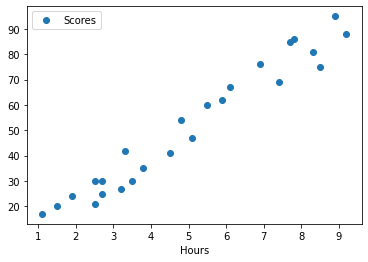

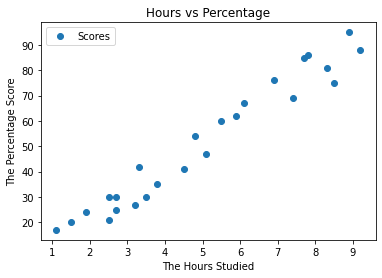

In [ ]:
# Plotting the distribution of scores
s_data.plot(x='Hours', y='Scores', style='o')  

data_load.plot(x='Hours', y='Scores', style='o')    
plt.title('Hours vs Percentage')    
plt.xlabel('The Hours Studied')    
plt.ylabel('The Percentage Score')    
plt.show()

***From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.***

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).
 

The process of dividing the data into attributes and labels is our next task, so we implement the same as below.

In [ ]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values  

X = data_load.iloc[:, :-1].values    
y = data_load.iloc[:, 1].values  

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:


The split of data into the training and test sets is very important as in this time we will be using Scikit Learn's builtin method of train_test_split(), as below:

In [ ]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm.

The very next process is to train the algorithm, thus the step include the following:

In [ ]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 
 
print("Training Completed!") 

Training Completed!


The very next phase is to implement the plotting test data using the previously trained test data:

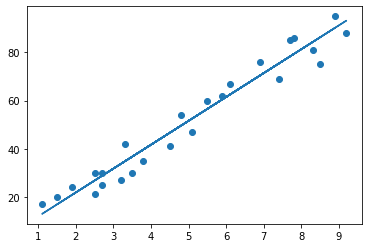

In [ ]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

Predicting the scores for the model is the next important step towards knowing our model, as we proceed as follows,

In [ ]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


Comparing the actual versus predicted model to understand our model fitting,

In [ ]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})    
df  

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Now it's time to test our model with sample testing hours, so in this case, we take 9.25 hours, i.e, if a student studies for 9.25 hours, approximately how many marks he can get based on the data we received and the model we applied.

In [ ]:
hours = [[9.25]]  
own_pred = regressor.predict(hours)  
print("Number of hours = {}".format(hours))  
print("Prediction Score = {}".format(own_pred[0]))

Number of hours = [[9.25]]
Prediction Score = 93.69173248737539


## **The Predicted score would be 93.69 if a student studies for 9.25 hours**

### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [ ]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982


Now we have successfully implemented the model and have received the output, the important thing that needs to be kept in mind  is that this model works only for the dataset we provided, the results may change if the data is changed and thus we need to optimize the model again.